In [1]:

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('TEST (1).csv')

In [2]:
df

,windspeed,rainfall24,rainfall6,rainfallaverage,area,yield,distance,areayieldrataio,percentageofarea,darea,yielda,fgprice,dctrice
0,0.000000,1.535972,3.032222,0.959983,2870.00,3.37,0.00000,851.632047,0.247070,709.091324,0.832626,20.79,1.113550e+07
1,0.000000,2.141071,3.942857,1.338170,491.00,4.36,0.00000,112.614679,0.244428,120.014173,1.065706,20.79,2.412279e+06
2,7.116629,5.809375,20.589580,3.630859,1330.88,4.42,385.79860,301.104072,0.312983,416.543187,1.383386,20.79,1.086828e+07
3,67.089467,3.908854,11.341670,2.443034,5767.00,4.65,26.26015,1240.215054,0.567852,3274.800267,2.640510,20.79,1.630911e+08
4,0.000000,0.805469,1.580208,0.503418,4710.00,4.14,0.00000,1137.681159,0.130472,614.521934,0.540153,20.79,6.260539e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39739,8.841748,2.292639,4.211667,1.432899,916.00,3.16,392.92250,289.873418,0.203710,186.598393,0.643724,20.79,2.265505e+06
39740,0.000000,0.030208,0.062500,0.018880,1046.00,3.07,0.00000,340.716612,0.556501,582.100434,1.708459,20.79,1.875686e+07
39741,8.575491,2.652500,5.460000,1.657812,753.00,4.52,291.88280,166.592920,0.161440,121.564092,0.729707,20.79,1.673060e+06
39742,9.387123,1.696181,3.348611,1.060113,99.00,1.93,496.10710,51.295337,0.154780,15.323183,0.298725,20.79,8.633316e+04


windspeed           0.124798
rainfall24          0.078049
rainfall6           0.110739
rainfallaverage     0.078049
area                0.656873
yield               0.320771
distance            0.066964
areayieldrataio     0.490851
percentageofarea    0.392754
darea               0.913482
yielda              0.511793
fgprice             0.047418
Name: dctrice, dtype: float64


c:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


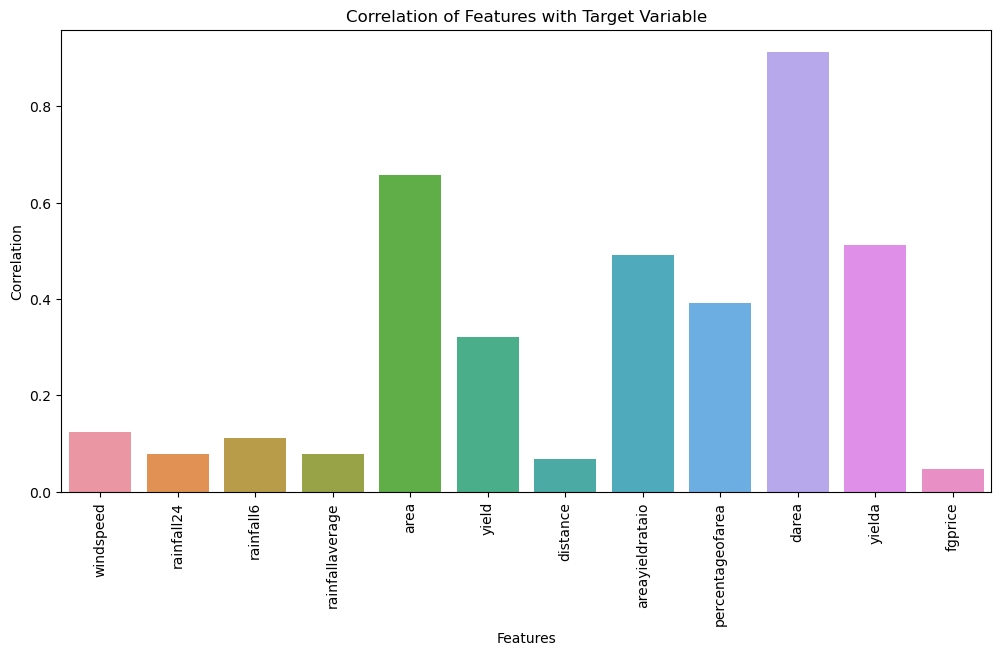

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'target' is your target variable
correlation = df.corr()['dctrice'].drop('dctrice')

# Display the correlations
print(correlation)

# Plot the correlations
plt.figure(figsize=(12, 6))
sns.barplot(correlation.index, correlation.values)
plt.title('Correlation of Features with Target Variable')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=90)
plt.show()

In [4]:
# Split the dataset into features and target variable
X = df.drop(['dctrice','percentageofarea','yielda','darea','rainfallaverage','areayieldrataio'], axis=1)
y = df.drop(['darea','percentageofarea','yielda','windspeed','rainfall24','rainfall6','rainfallaverage','areayieldrataio','area', 'yield', 'fgprice','distance'], axis=1)

In [5]:
# Remove the rows with zero values from the training set and testing set
mask = X['windspeed'] != 0

# Apply the mask to X_train
X = X[mask]

# Apply the mask to y_train
y = y[mask]

In [6]:
# Remove the rows with zero values from the training set and testing set
mask =y['dctrice'] != 0

# Apply the mask to y_train
y = y[mask]

# Apply the mask to X_train
X = X[mask]

In [7]:
X.shape, y.shape

((15401, 7), (15401, 1))

In [8]:
# Training and Temporary Set (80-20 split)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Temporary set into a validation set and a test set using (50-50 split)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [9]:
y_train

,dctrice
2998,6.476275e+06
16149,5.553857e+07
1106,5.681104e+05
1368,2.836358e+07
8530,2.522815e+05
...,...
14774,4.837969e+07
35629,2.724130e+03
15169,8.963281e+04
2172,1.882052e+08


In [10]:

X_train.shape, y_train.shape

((12320, 7), (12320, 1))

In [11]:
y_train.info()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12320 entries, 2998 to 18976
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dctrice  12320 non-null  float64
dtypes: float64(1)
memory usage: 192.5 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12320 entries, 2998 to 18976
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   windspeed   12320 non-null  float64
 1   rainfall24  12320 non-null  float64
 2   rainfall6   12320 non-null  float64
 3   area        12320 non-null  float64
 4   yield       12320 non-null  float64
 5   distance    12320 non-null  float64
 6   fgprice     12320 non-null  float64
dtypes: float64(7)
memory usage: 770.0 KB


In [12]:
X_test = pd.DataFrame(X_test).apply(pd.to_numeric, errors='coerce')
X_train = pd.DataFrame(X_train).apply(pd.to_numeric, errors='coerce')
y_train = pd.DataFrame(y_train).apply(pd.to_numeric, errors='coerce')
y_test = pd.DataFrame(y_test).apply(pd.to_numeric, errors='coerce')

In [13]:
X_train.shape, y_train.shape

((12320, 7), (12320, 1))

In [14]:
# # Remove the rows with zero values from the training set and testing set
# mask = X_train['windspeed'] != 0

# # Apply the mask to X_train
# X_train = X_train[mask]

# # Apply the mask to y_train
# y_train = y_train[mask]

In [15]:
X_train.shape, y_train.shape

((12320, 7), (12320, 1))

In [16]:
# # Remove the rows with zero values from the training set and testing set
# mask =y_train['dctrice'] != 0

# # Apply the mask to X_train
# X_train = X_train[mask]

# # Apply the mask to y_train
# y_train = y_train[mask]

In [17]:
# # Remove the rows with zero values from the training set and testing set
# mask =X_val['windspeed'] != 0

# # Apply the mask to X_train
# X_val = X_val[mask]

# # Apply the mask to y_train
# y_val = y_val[mask]

In [18]:
X_val

,windspeed,rainfall24,rainfall6,area,yield,distance,fgprice
31511,15.974263,0.007738,0.027381,164.0,4.11,150.223900,19.00
31001,44.970222,2.393229,6.691667,105.0,4.55,3.731118,19.00
38328,7.252452,3.350521,6.300000,2739.0,3.68,280.959300,14.32
8001,33.878516,0.094583,0.213333,2167.0,2.94,85.724430,19.00
31097,11.845751,0.000000,0.000000,662.0,5.19,197.586500,19.00
...,...,...,...,...,...,...,...
7596,36.262834,0.546875,1.597917,254.0,3.79,74.362240,19.00
36565,3.864767,0.422128,0.422128,227.0,4.32,353.282200,14.32
11299,10.844943,0.000000,0.000000,2040.0,5.53,213.400400,19.00
6724,16.338128,0.056042,0.122500,988.0,3.25,190.806200,19.00


In [19]:
y_train

,dctrice
2998,6.476275e+06
16149,5.553857e+07
1106,5.681104e+05
1368,2.836358e+07
8530,2.522815e+05
...,...
14774,4.837969e+07
35629,2.724130e+03
15169,8.963281e+04
2172,1.882052e+08


In [20]:
# Null Remover

nan_rows = X_train[X_train.isna().any(axis=1)].index
X_train = X_train.drop(nan_rows)
y_train = y_train.drop(nan_rows)

print(np.where(pd.isnull(X_train)))

(array([], dtype=int64), array([], dtype=int64))


In [21]:
# Null Remover

nan_rows = X_val[X_val.isna().any(axis=1)].index
X_val = X_val.drop(nan_rows)
y_val = y_val.drop(nan_rows)

print(np.where(pd.isnull(X_val)))

(array([], dtype=int64), array([], dtype=int64))


In [22]:
X_train.shape,y_train.shape

((12320, 7), (12320, 1))

In [23]:
nan_rows = X_test[X_test.isna().any(axis=1)].index
X_test = X_test.drop(nan_rows)
y_test = y_test.drop(nan_rows)

In [24]:
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from joblib import load, dump
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score

# Load the models
svr_pipeline = load('SVR.joblib')
rf = load('RFR.joblib')


final_estimator = RandomForestRegressor(
    
    n_estimators=100, 
    max_depth=20, 
    min_samples_split=2, 
    min_samples_leaf=2, 
    max_leaf_nodes=100,
    random_state=42,
)

# Create a StackingRegressor
stacking_regressor = StackingRegressor(
    estimators=[('svr', svr_pipeline), ('rf', rf)],
    final_estimator=final_estimator
)

stacking_regressor.fit(X_train, y_train)

predictions = stacking_regressor.predict(X_test)

# Evaluate the model
r2 = stacking_regressor.score(X_test, y_test)
print(f'R-squared (Test): {r2}')

mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error (Test): {mae}')

predictionsVal = stacking_regressor.predict(X_val)

# Evaluate the model


r2 = stacking_regressor.score(X_val, y_val)
print(f'\nR-squared (Validation): {r2}')
maev = mean_absolute_error(y_val, predictionsVal)
print(f'Mean Absolute Error (Validation): {maev}')

# Assuming `predictions` are the predicted values from your model
explained_variance = explained_variance_score(y_test, predictions)

print(f'\nExplained Variance: {explained_variance}')



c:\Users\Asus\anaconda3\lib\site-packages\sklearn\ensemble\_stacking.py:758: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R-squared (Test): 0.9271257861187203
Mean Absolute Error (Test): 4772850.053894532

R-squared (Validation): 0.9347009688420675
Mean Absolute Error (Validation): 4554562.12095811

Explained Variance: 0.9271271625621899


In [25]:

predictions = stacking_regressor.predict(X_test)

# Evaluate the model
r2 = stacking_regressor.score(X_test, y_test)
print(f'R-squared (Test): {r2}')

mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error (Test): {mae}')

predictionsVal = stacking_regressor.predict(X_val)

# Evaluate the model


r2 = stacking_regressor.score(X_val, y_val)
print(f'\nR-squared (Validation): {r2}')
maev = mean_absolute_error(y_val, predictionsVal)
print(f'Mean Absolute Error (Validation): {maev}')

# Assuming `predictions` are the predicted values from your model
explained_variance = explained_variance_score(y_test, predictions)
print(f'\nExplained Variance (Test): {explained_variance}')


explained_variance = explained_variance_score(y_val, predictionsVal)
print(f'Explained Variance (Validation): {explained_variance}')


# Calculate and print MAE in percentage points for test set
mae_percentage_test = (mae / y_test.values.mean()) * 100
print(f'\nMean Absolute Error (Test, p.p.): {mae_percentage_test}%')

# Calculate and print MAE in percentage points for test set
mae_percentage_val = (mae / y_val.values.mean()) * 100
print(f'Mean Absolute Error (Validation, p.p.): {mae_percentage_val}%')


R-squared (Test): 0.9271257861187203
Mean Absolute Error (Test): 4772850.053894532

R-squared (Validation): 0.9347009688420675
Mean Absolute Error (Validation): 4554562.12095811

Explained Variance (Test): 0.9271271625621899
Explained Variance (Validation): 0.9347394732465331

Mean Absolute Error (Test, p.p.): 32.47883999150081%
Mean Absolute Error (Validation, p.p.): 32.98226427999772%


In [26]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12320 entries, 2998 to 18976
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dctrice  12320 non-null  float64
dtypes: float64(1)
memory usage: 192.5 KB


In [27]:
print(['{:.2f}'.format(pred) for pred in predictionsVal])

['691556.06', '691556.06', '10126232.01', '1786518.46', '5455201.29', '1981036.50', '1786518.46', '15602917.74', '9596372.77', '1408492.45', '71538323.11', '24699391.73', '987198.08', '1951479.88', '7114175.58', '3729234.60', '691556.06', '14033206.20', '4502678.26', '3756047.72', '691556.06', '3475560.75', '691556.06', '10941390.92', '1031386.93', '21015452.71', '9596372.77', '1391179.22', '1269447.96', '691556.06', '1347303.43', '691556.06', '39374698.41', '11429810.42', '691556.06', '44780564.80', '691556.06', '25715677.39', '11980541.83', '691556.06', '15554048.21', '691556.06', '6510127.08', '691556.06', '5844453.48', '14665098.74', '2059292.32', '691556.06', '691556.06', '6739350.76', '1024230.23', '6326350.17', '45248959.60', '1526140.32', '691556.06', '3729234.60', '1491115.56', '691556.06', '944409.25', '24659120.78', '1230498.31', '3635272.11', '691556.06', '5882258.29', '3667723.05', '3909435.31', '7635193.42', '3380322.97', '18285356.49', '691556.06', '691556.06', '1526140.

In [28]:
# from sklearn.pipeline import make_pipeline
# from joblib import dump

# pipeline = make_pipeline(stacking_regressor)

# # Fit the pipeline
# pipeline.fit(X_train, y_train)

# # Save the pipeline
# dump(pipeline, 'STACKED-SVR_RF.joblib')

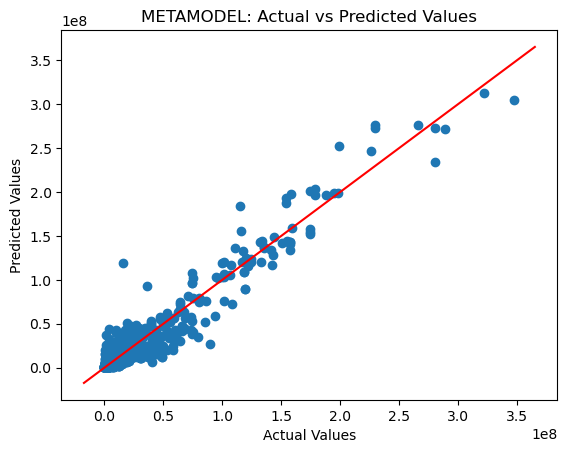

In [29]:
import matplotlib.pyplot as plt

# Make predictions
predictions = stacking_regressor.predict(X_test)

# Create a scatter plot
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('METAMODEL: Actual vs Predicted Values')

# Diagonal line
limits = [np.min([plt.xlim(), plt.ylim()]),  # find the lower limit among x and y axes
          np.max([plt.xlim(), plt.ylim()])]  # find the upper limit among x and y axes
plt.plot(limits, limits, color='red')

plt.show()

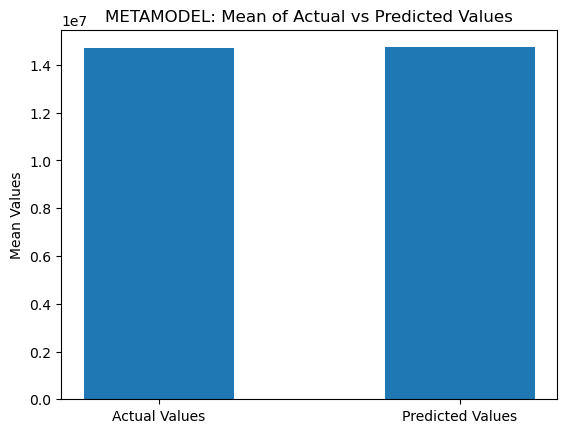

[14695260.222173912, 14736061.08260688]

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Make predictions
predictions = stacking_regressor.predict(X_test)

# Calculate means
mean_actual = np.mean(y_test)
mean_predicted = np.mean(predictions)

# Ensure mean_actual and mean_predicted are scalar values
mean_actual = mean_actual.item()
mean_predicted = mean_predicted.item()

# Create a bar graph
labels = ['Actual Values', 'Predicted Values']
values = [mean_actual, mean_predicted]
plt.bar(labels, values, width=0.5)

plt.ylabel('Mean Values')
plt.title('METAMODEL: Mean of Actual vs Predicted Values')

plt.show()

values

c:\Users\Asus\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


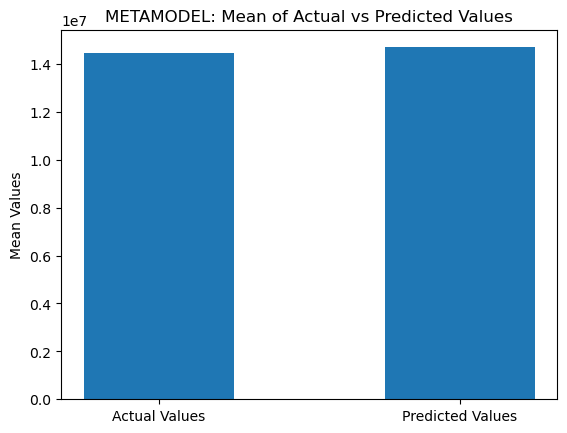

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Make predictions
predictions = stacking_regressor.predict(X_val)

# Calculate means
mean_actual = np.mean(y_val)
mean_predicted = np.mean(predictionsVal)

# Ensure mean_actual and mean_predicted are scalar values
mean_actual = mean_actual.item()
mean_predicted = mean_predicted.item()

# Create a bar graph
labels = ['Actual Values', 'Predicted Values']
values = [mean_actual, mean_predicted]
plt.bar(labels, values, width=0.5)

plt.ylabel('Mean Values')
plt.title('METAMODEL: Mean of Actual vs Predicted Values')

plt.show()

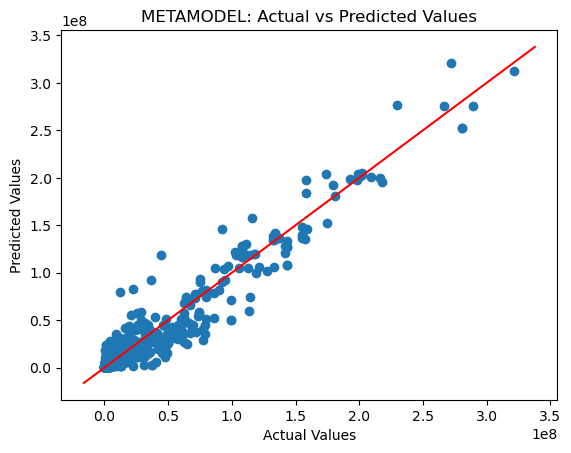

In [31]:
import matplotlib.pyplot as plt

# Make predictions
predictionsVal = stacking_regressor.predict(X_val)

# Create a scatter plot
plt.scatter(y_val, predictionsVal)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('METAMODEL: Actual vs Predicted Values')

# Diagonal line
limits = [np.min([plt.xlim(), plt.ylim()]),  # find the lower limit among x and y axes
          np.max([plt.xlim(), plt.ylim()])]  # find the upper limit among x and y axes
plt.plot(limits, limits, color='red')

plt.show()

In [32]:
import pandas as pd
import numpy as np

# Ensure y_test and predictions are 1-dimensional
y_test = np.ravel(y_test)
predictions = np.ravel(predictions)

# Create a DataFrame with actual and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': ['{:.2f}'.format(pred) for pred in predictions]})

# Display the DataFrame
print(df.head(20).to_string(index=True))

         Actual    Predicted
0     738192.76    987198.08
1    8366137.44  16136323.80
2    1554548.52   3729234.60
3    1024538.36   2043831.54
4     571594.71   1369587.23
5    1006070.43   6875096.60
6    3373899.59   3729234.60
7      22651.45    691556.06
8   58069322.65  19536137.30
9     208189.28   1255894.90
10    282028.13    691556.06
11     87864.71    691556.06
12  28767680.15  24903509.11
13   1178074.71   1670816.38
14  30363474.74  21035963.87
15  13272386.18   4502678.26
16   7136440.98   3382481.37
17   2111223.37   5053140.34
18  48370619.70  36261389.67
19   6993733.89  12509870.70
